# Import libraries

In [5]:
import numpy as np

import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical

In [16]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixels
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# The datasets are combined into one dataset. This makes it easier to normalize and look at
# the label distribution.
variables = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

print(variables.shape, labels.shape)

(70000, 28, 28) (70000,)


# Let's look at the data

### Distribution of classes

In [17]:
digit, counts = np.unique(labels, return_counts=True)
distribution = np.asarray((digit, counts)).T

total_samples = np.sum(distribution[:, 1])
percentages = (distribution[:, 1] / total_samples) * 100

for digit, percentage in zip(distribution[:, 0], percentages):
    print(f"Digit {digit}: {percentage:.1f}%")

Digit 0: 9.9%
Digit 1: 11.3%
Digit 2: 10.0%
Digit 3: 10.2%
Digit 4: 9.7%
Digit 5: 9.0%
Digit 6: 9.8%
Digit 7: 10.4%
Digit 8: 9.8%
Digit 9: 9.9%


The labels are not evenly distributed, but the distribution is not terribly skewed.

### Visualization of data

To get a feel for the data, let's plot the first 10 numbers.

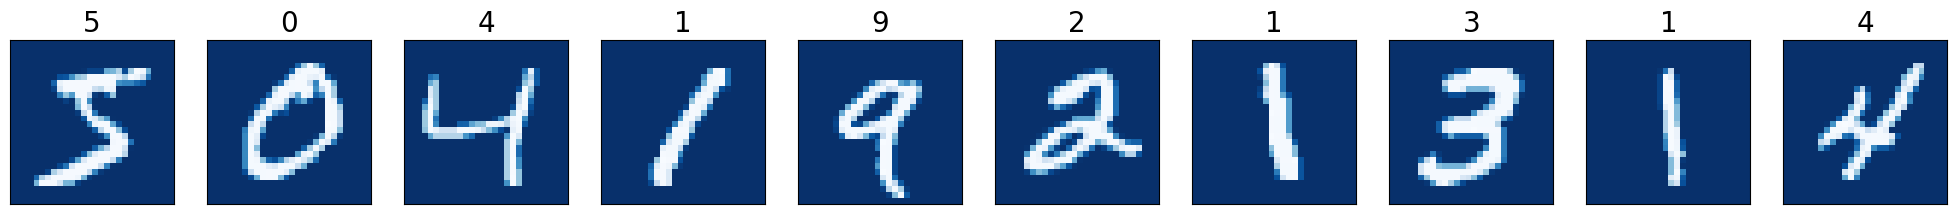

In [18]:
fig = plt.figure(figsize=(25, 10))
for idx in np.arange(10): # Look at the first 10 elements
    ax = fig.add_subplot(1, 10, idx+1, xticks=[], yticks=[]) # Make a subplot per element
    ax.imshow(variables[idx], cmap='Blues_r') 
    ax.set_title(str(labels[idx]),fontsize=20) # Set the title and size of the title

### Lets look at one digit

Here the first digit in the dataset is displayed as greyscale, where 0 represents black and 1 represents white, and all the numbers inbetween are a mix of the two.

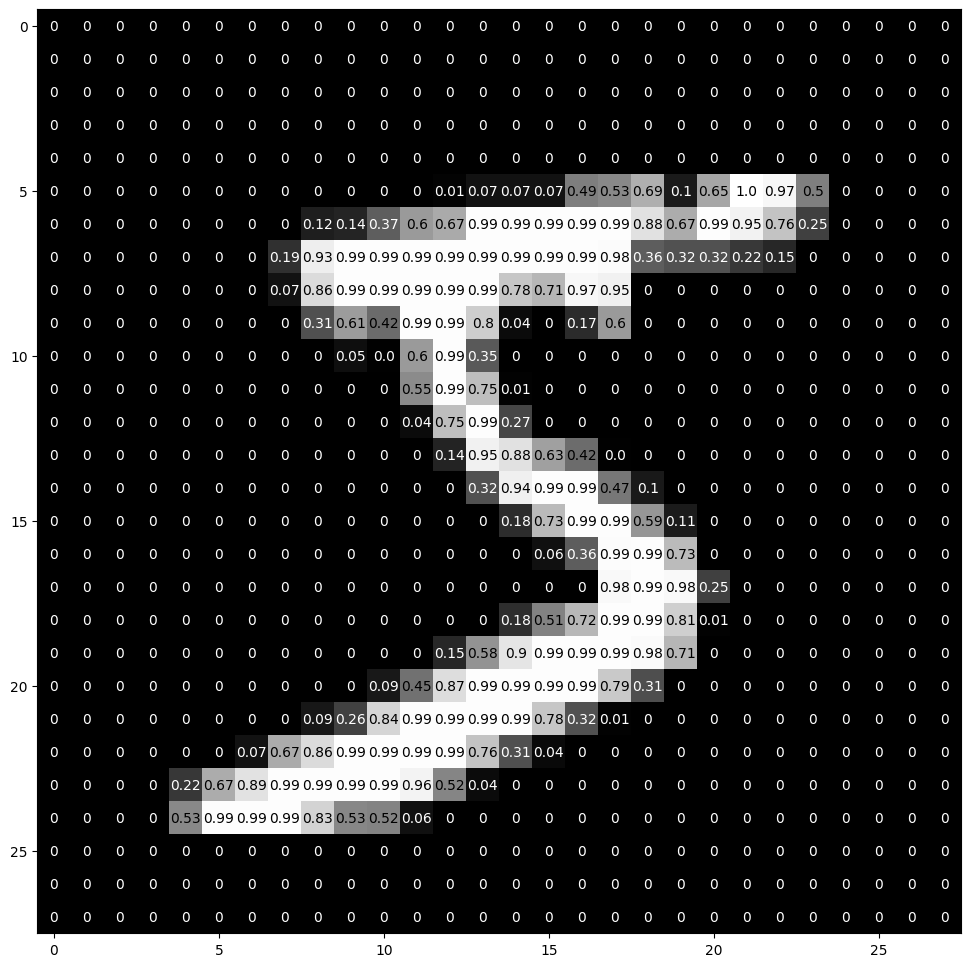

In [19]:
digit = variables[0]

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(digit, cmap='gray') # gray for better comprehension
width, height = digit.shape # assigning the shape of the digit to width and height
thresh = digit.max()/2.5 # threshold for using black or white numbers in the annotation
for x in range(width):
    for y in range(height):
        val = round(digit[x][y],2) if digit[x][y] !=0 else 0 # assigns position to val. rounds if not 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if digit[x][y]<thresh else 'black')

## Averages

Obviously there should be a common pattern for each class in the dataset. In the case of this dataset, the images can be averaged by class and a pattern should be easily recognizable. 

All instances in the classes are summed up, averaged, and visualized. Luckily, the numbers are fairly easily distinguishable - even if the labels would be removed.

The images in the dataset are all of low dimensionality, but looking at the average images it seems there is a somewhat significant border. In order to reduce dimensionality, this border could be cropped.

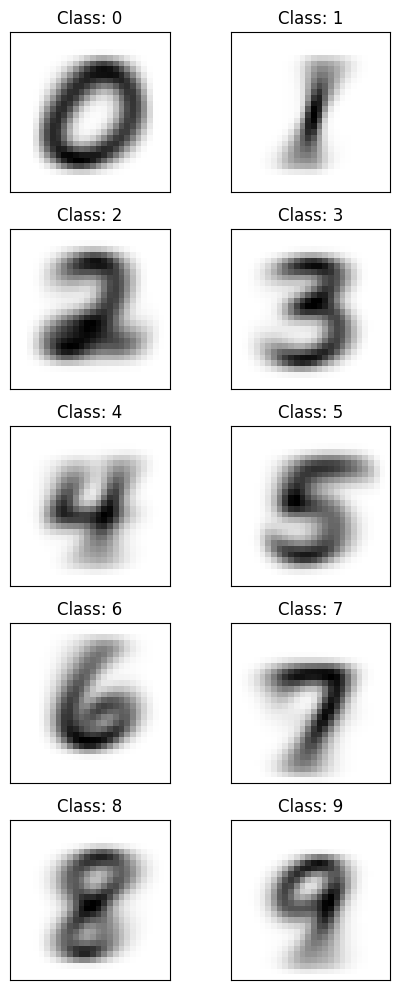

In [20]:
# Empty array to store the sums of the images
sums = np.zeros((10, 28, 28))
counts = np.zeros(10)

# Sum the images in each class
for i in range(len(variables)):
    sums[labels[i]] += variables[i]
    counts[labels[i]] += 1

# Compute the average image for each class
averages = sums / counts.reshape((10, 1, 1))

# Plot the average image for each class
plt.figure(figsize=(5, 10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(averages[i], cmap=plt.cm.binary)
    plt.title(f'Class: {i}')

plt.tight_layout()
plt.show()